In [15]:
#loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,root_mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [17]:
df=pd.read_excel('cleaned.xlsx')


In [19]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,1.720979,98.907149,0,0,1
1,2013,4.75,2.255493,116.919996,1,0,1
2,2017,7.25,2.287471,60.252218,0,0,1
3,2011,2.85,1.423108,54.300312,0,0,1
4,2014,4.60,1.927164,116.381220,1,0,1
...,...,...,...,...,...,...,...
291,2016,9.50,2.451005,107.449775,1,0,1
292,2015,4.00,1.774952,131.742217,0,0,1
293,2009,3.35,2.397895,151.021928,0,0,1
294,2017,11.50,2.525729,66.406442,1,0,1


In [21]:
sc=StandardScaler()

In [23]:
df['Kms_Driven']=sc.fit_transform(df[['Kms_Driven']])
df['Kms_Driven']=sc.transform(df[['Kms_Driven']])

In [25]:
df['Present_Price']=sc.fit_transform(df[['Present_Price']])
df['Present_Price']=sc.transform(df[['Present_Price']])

- Here we have to do scaling because the knn works with distance formulae so if the data points are with high magnitude leads to biased
so we have to use scaling

In [28]:
X=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']

- splitting the x and y 

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=94)

- Using the train test split dividing the data into test data train data
- Train data is used for training purpose
- And the test data is used for prediction or evaluation purpose

# Modelling The Data

In [108]:
knnr=KNeighborsRegressor(n_neighbors=4,p=1,weights='distance',metric='minkowski')
knnr.fit(X_train,y_train)
y_train_pred=knnr.predict(X_train)
train_r2=r2_score(y_train,y_train_pred)
crossvalidation=cross_val_score(knnr,X_train,y_train,cv=5,scoring='r2').mean()
train_mse=mean_squared_error(y_train,y_train_pred)
train_rmse=root_mean_squared_error(y_train,y_train_pred)
print('train_r2:',train_r2)
print('crossvalidation:',crossvalidation)

train_r2: 1.0
crossvalidation: 0.7986033873281263


- Here it using four data points also known as neighbour points 
- Here the model is used Euclidean distance
- weights are taken according to the distance
- When im using thsi the train accuracy is 100% and cv is 79%

# Prediction

In [110]:
y_test_pred=knnr.predict(X_test)
test_r2=r2_score(y_test,y_test_pred)
print('test_r2:',test_r2)

test_r2: 0.8609507564491261


In [ ]:
- Train accuracy is 86%

# Test evalution metrics

In [112]:
test_mse=mean_squared_error(y_test,y_test_pred)
test_rmse=root_mean_squared_error(y_test,y_test_pred)
print('test_mse:',test_mse)
print('test_rmse:',test_rmse)

test_mse: 3.463961673206843
test_rmse: 1.86117212347672


The mse is 3.4
and the rmse is 1.8
from those the error rate was decreased

**Plotting the Best Fit Line**

In [132]:
residuals=y_test-y_test_pred

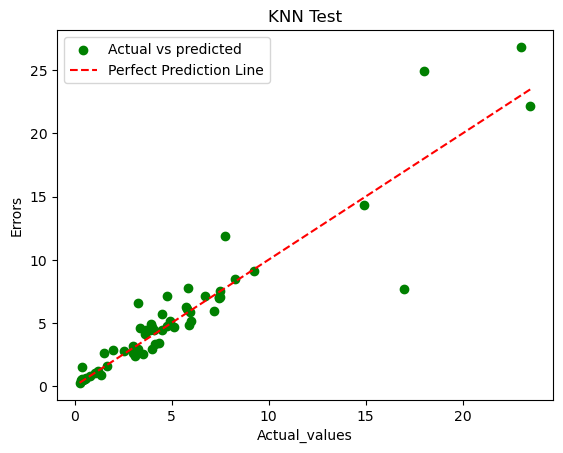

In [138]:
plt.scatter(y_test,y_test_pred,color='g',label='Actual vs predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
         color='r', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual_values')
plt.ylabel('Errors')
plt.legend()
plt.title('KNN Test')
plt.show()

- from the above we conclude that for small datapoints it is predicting the output with low error 
- But for large errors it is predicting with high error
- For actual large values the model is predictions deviates significantly from the red line

In [ ]:
**Plotting the residual plot)

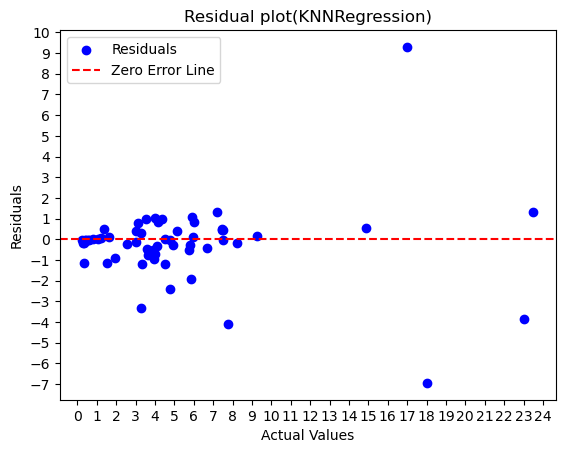

In [195]:
residulas=y_test-y_test_pred
plt.scatter(y_test,residuals,color='b',label='Residuals')
plt.axhline(0,color='r',ls='--',label='Zero Error Line')
plt.ylabel('Residuals')
plt.xlabel('Actual Values')
plt.xticks(range(0,25))
plt.yticks(np.arange(-7, 11, 1))  
plt.title('Residual plot(KNNRegression)')
plt.legend()
plt.show()

**Hyper Parameter Tuning**

In [51]:
estimator=KNeighborsRegressor()
param_grid={'n_neighbors':list(range(1,20)),
            'weights':['uniform','distance'],
            'metric':['minkowski'],
            'p':[1,2]}
gd=GridSearchCV(estimator,param_grid,cv=5,scoring='r2')
gd.fit(X_train,y_train)
gd.best_params_

{'metric': 'minkowski', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}